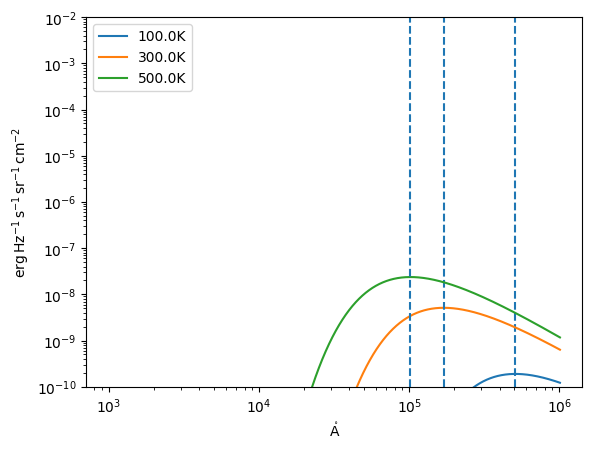

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support

from astropy.modeling import models
bb100 = models.BlackBody(temperature=100*u.K)
bb300 = models.BlackBody(temperature=300*u.K)
bb500 = models.BlackBody(temperature=500*u.K)
wav = np.arange(1000, 1010000) * u.AA

flux100 = bb100(wav)
flux300 = bb300(wav)
flux500 = bb500(wav)
with quantity_support():
    plt.figure()

    for flux, bb in zip([flux100, flux300, flux500], [bb100, bb300, bb500]):
        plt.loglog(wav, flux, label=f'{bb.temperature.value}K')
        plt.axvline(bb.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
        plt.legend()
    plt.ylim(1e-10, 1e-2)    
    plt.show()
